# Random Subsampling Analysis – SNR Distributions

This notebook evaluates the impact of subsampling on the reconstructed nano-FTIR interferograms and spectra.

---

## 1. Objective

Simulate subsampling to investigate the minimum number of interferometer positions needed to achieve reliable reconstruction of hyperspectral data while significantly reducing measurement time.

## 2. Load Data

Load the full interferogram dataset and associated metadata.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman

In [3]:
SNR20_1 = np.load('SNR20_1.npy')
SNR20_2 = np.load('SNR20_2.npy')
SNR30_1 = np.load('SNR30_1.npy')
SNR30_2 = np.load('SNR30_2.npy')
SNR40_1 = np.load('SNR40_1.npy')
SNR40_2 = np.load('SNR40_2.npy')
SNR45_1 = np.load('SNR45_1.npy')
SNR45_2 = np.load('SNR45_2.npy')
SNR50_1 = np.load('SNR50_1.npy')
SNR50_2 = np.load('SNR50_2.npy')
SNR60_1 = np.load('SNR60_1.npy')
SNR60_2 = np.load('SNR60_2.npy')
SNRFull_1 = np.load('SNRFull_1.npy')
SNRFull_2 = np.load('SNRFull_2.npy')
SNR45grid_1 = np.load('SNR45grid_1.npy')
SNR45grid_2 = np.load('SNR45grid_2.npy')
SNR45WL_1 = np.load('SNR45WL_1.npy')
SNR45WL_2 = np.load('SNR45WL_2.npy')

data1 = [np.real(SNR20_1),np.real(SNR30_1),np.real(SNR40_1),np.real(SNR45_1),np.real(SNR50_1),np.real(SNR60_1)]
data2 = [np.real(SNR20_2),np.real(SNR30_2),np.real(SNR40_2),np.real(SNR45_2),np.real(SNR50_2),np.real(SNR60_2)]
data = [np.real(SNR20_1),np.real(SNR20_2),np.real(SNR30_1),np.real(SNR30_2),np.real(SNR40_1),np.real(SNR40_2),np.real(SNR45_1),np.real(SNR45_2),np.real(SNR50_1),np.real(SNR50_2),np.real(SNR60_1),np.real(SNR60_2)]

type1 = [np.real(SNR45_1), np.real(SNR45WL_1),np.real(SNR45grid_1)]
type2 = [np.real(SNR45_2), np.real(SNR45WL_2),np.real(SNR45grid_2)]
xlabelstype = ['Random','WL','Grid']

In [4]:
print(SNR45WL_1)

[0.        +0.j 0.7809792 +0.j 0.        +0.j 0.        +0.j
 0.36749895+0.j 2.60815077+0.j 0.62900834+0.j 2.00735448+0.j
 0.        +0.j 1.80901366+0.j 2.92694786+0.j 0.2958315 +0.j
 0.05670311+0.j 2.72632026+0.j 2.82118714+0.j 1.15470054+0.j
 3.09171371+0.j 1.62045323+0.j 0.        +0.j 0.        +0.j]


In [16]:
fig = plt.figure(1, figsize=(9, 6))

xlabels1=['20 ','30 ','40 ','45 ','50  ','60  ']
xlabels=['20   S1', '20   S2','30   S1', '30   S2','40   S1', '40   S2','45   S1', '45   S2','50   S1', '50   S2','60   S1', '60   S2']

<Figure size 648x432 with 0 Axes>

No handles with labels found to put in legend.


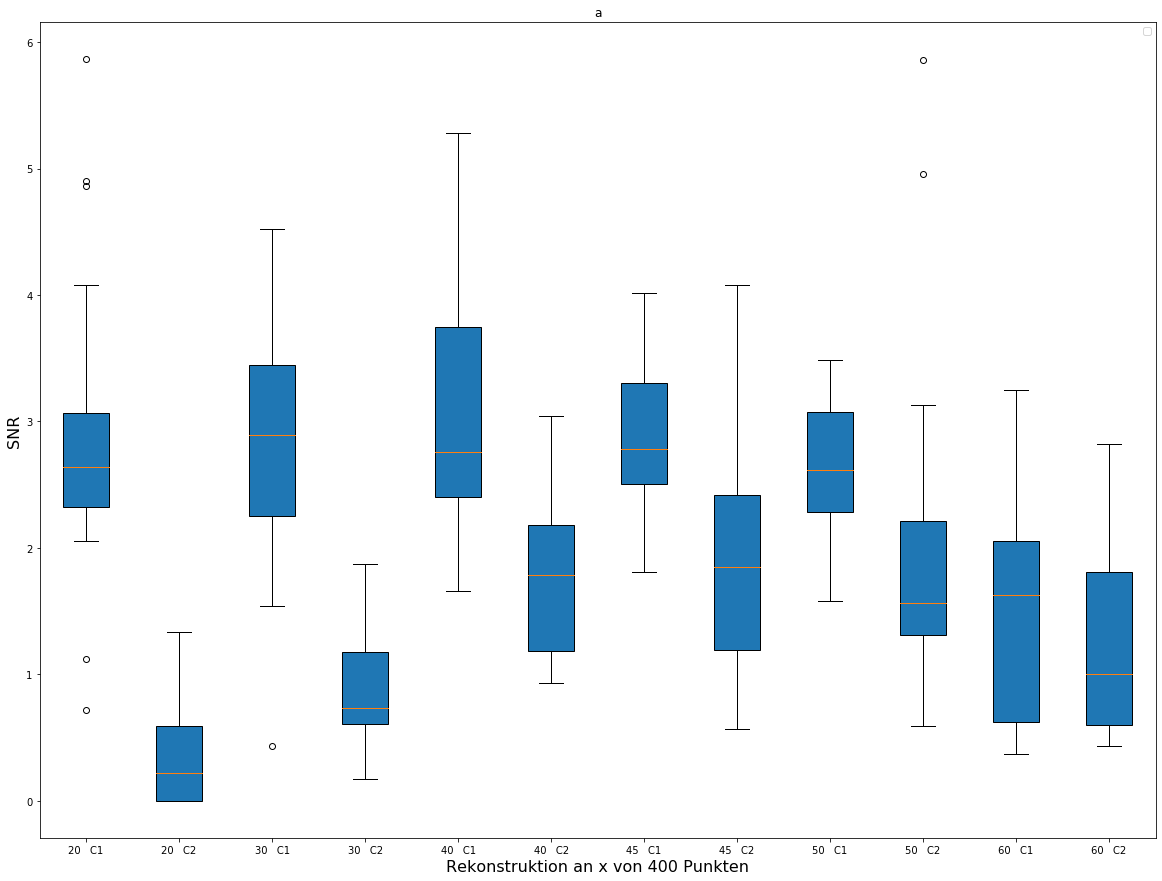

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = data
labels = xlabels

plt.figure(figsize=(20,15))

# rectangular box plot
bplot1 = plt.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Rectangular box plot')

# notch shape box plot

#plt.plot(SNRFull_1)
# fill with colors

plt.legend()
plt.title('')
plt.ylabel('SNR',size = 16)
plt.xlabel('Anzahl an Interferometerpositionen', size = 16)
# adding horizontal grid lines
ax.yaxis.grid(True)
ax.set_xlabel('Three separate samples',size = 16,)
ax.set_ylabel('Observed values')
fig1 = plt.gcf()
plt.show()
fig1.savefig("SNR Random.pdf")

No handles with labels found to put in legend.


6
6


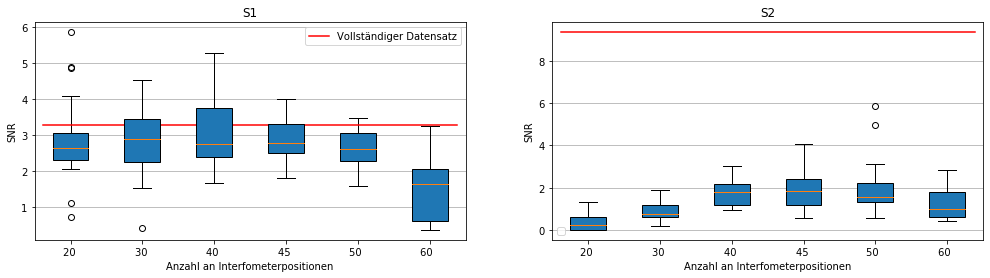

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data

print(len(xlabels1))
print(len(data1))
labels = xlabels1

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data1,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.axhline(y=SNRFull_1, xmin=0.02, xmax=0.98, color='r', label='Vollständiger Datensatz')
ax1.set_title('S1')

# notch shape box plot
bplot2 = ax2.boxplot(data2,
                     #notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.axhline(y=SNRFull_2, xmin=0.02, xmax=0.98, color='r')
ax2.set_title('S2')

# fill with colors
#colors = ['pink', 'lightblue', 'lightgreen']
#for bplot in (bplot1, bplot2):
#    for patch, color in zip(bplot['boxes'], colors):
#        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Anzahl an Interfometerpositionen')
    ax.set_ylabel('SNR')
ax1.legend(loc='upper right')
plt.legend()
plt.show()
fig.savefig("SNRBox.pdf")

No handles with labels found to put in legend.


3
3


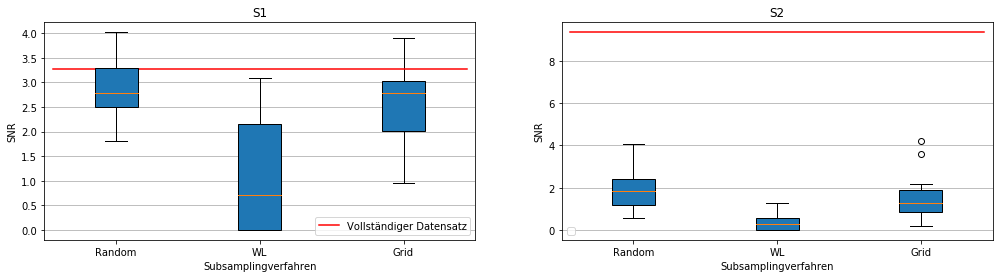

In [29]:
import matplotlib.pyplot as plt
import numpy as np


print(len(xlabelstype))
print(len(type1))
labels = xlabelstype

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(17, 4))


bplot1 = ax1.boxplot(type1,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.axhline(y=SNRFull_1, xmin=0.02, xmax=0.98, color='r',label='Vollständiger Datensatz')
ax1.set_title('S1')


bplot2 = ax2.boxplot(type2,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.axhline(y=SNRFull_2, xmin=0.02, xmax=0.98, color='r')
ax2.set_title('S2')

for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Subsamplingverfahren')
    ax.set_ylabel('SNR')
ax1.legend(loc='lower right')
plt.legend()
plt.show()
fig.savefig("SNRSamplingvBox.pdf")

In [22]:
S1 = np.array([np.mean(SNR20_1),np.mean(SNR30_1),np.mean(SNR40_1),np.mean(SNR45_1), np.mean(SNR45WL_1),np.mean(SNR45grid_1),np.mean(SNR50_1),np.mean(SNR60_1)])
S2 = np.array([np.mean(SNR20_2),np.mean(SNR30_2),np.mean(SNR40_2),np.mean(SNR45_2), np.mean(SNR45WL_2),np.mean(SNR45grid_2),np.mean(SNR50_2),np.mean(SNR60_2)])

punkte= np.array([20,30,40,45,45,45,50,60])

In [23]:
S1err = np.array([np.std(SNR20_1)/(np.sqrt(20-1)),np.std(SNR30_1)/(np.sqrt(20-1)),np.std(SNR40_1)/(np.sqrt(20-1)),np.std(SNR45_1)/(np.sqrt(20-1)), np.std(SNR45WL_1)/(np.sqrt(20-1)),np.std(SNR45grid_1)/(np.sqrt(20-1)),np.std(SNR50_1)/(np.sqrt(20-1)),np.std(SNR60_1)/(np.sqrt(20-1))])
S2err = np.array([np.std(SNR20_2)/(np.sqrt(20-1)),np.std(SNR30_2)/(np.sqrt(20-1)),np.std(SNR40_2)/(np.sqrt(20-1)),np.std(SNR45_2)/(np.sqrt(20-1)), np.std(SNR45WL_2)/(np.sqrt(20-1)),np.std(SNR45grid_2)/(np.sqrt(20-1)),np.std(SNR50_2)/(np.sqrt(20-1)),np.std(SNR60_2)/(np.sqrt(20-1))])

print(np.mean(SNR45grid_1)+np.std(SNR45grid_1)/(np.sqrt(20-1)))

(2.7966259867585403+0j)


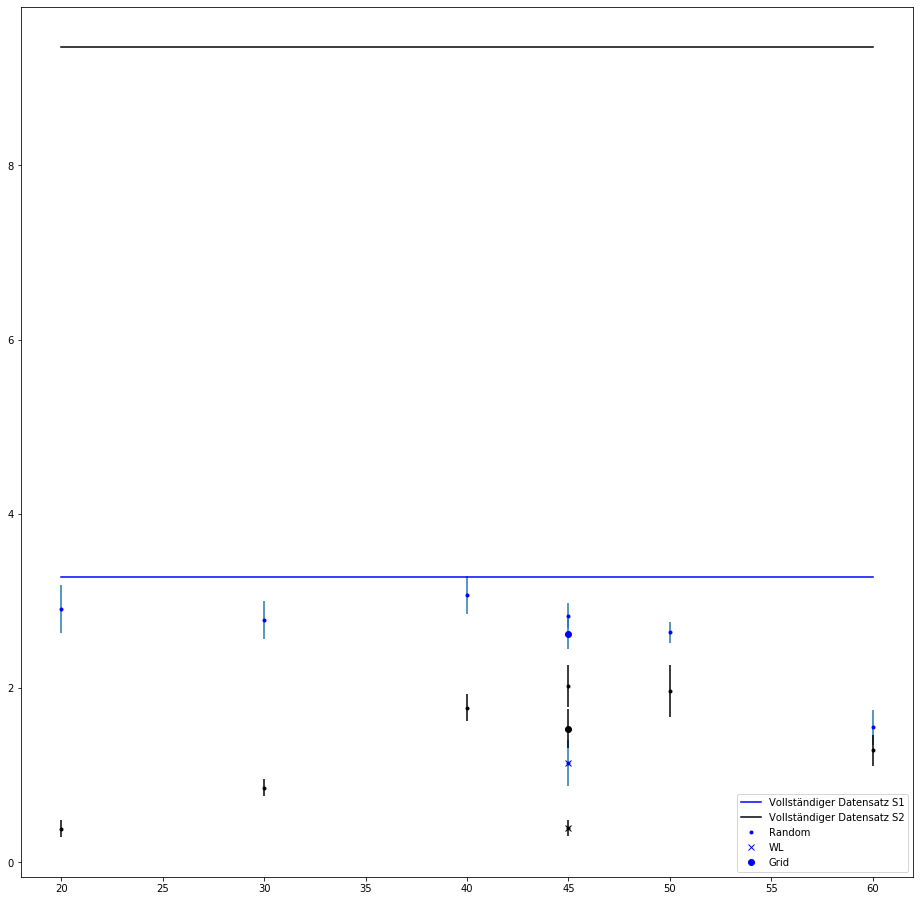

In [25]:
 

fig= plt.figure(figsize=(16, 16))
plt.plot(punkte,np.ones(8)*np.mean(SNRFull_1),  color='b',label='Vollständiger Datensatz S1')
plt.plot(punkte,np.ones(8)*np.mean(SNRFull_2),  color='k',label='Vollständiger Datensatz S2')

plt.plot(punkte, np.real(S1), 'b.' ,label='Random')
plt.plot(45,np.real(np.mean(SNR45WL_1)), 'bx' ,label='WL')
plt.plot(45,np.real(np.mean(SNR45grid_1)), 'bo' ,label='Grid')
plt.errorbar(punkte, np.real(S1), yerr=S1err, xerr=0 , fmt='none')#plt.plot(punkte, S2, 'k.' )
plt.plot(punkte, np.real(S2), 'k.' )
plt.plot(45,np.real(np.mean(SNR45WL_2)), 'kx' )
plt.plot(45,np.real(np.mean(SNR45grid_2)), 'ko' )
plt.errorbar(punkte, np.real(S2), yerr=S2err, xerr=0 , fmt='none', ecolor='k')
plt.legend()


No handles with labels found to put in legend.


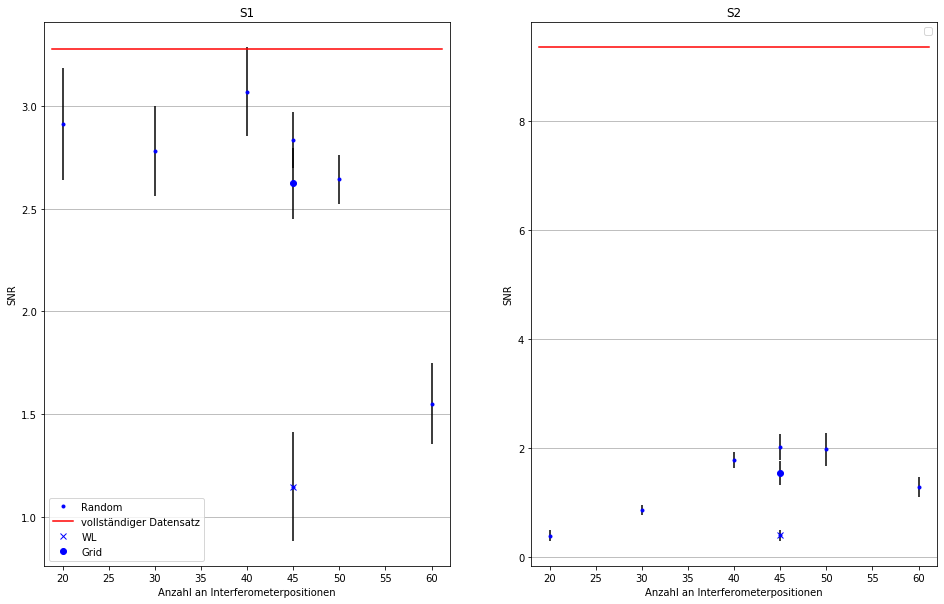

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('')
ax1.plot(punkte, np.real(S1),'b.' ,label='Random')
ax1.axhline(y=np.real(SNRFull_1), xmin=0.02, xmax=0.98, color='r', label='vollständiger Datensatz')
ax1.plot(45,np.real(np.mean(SNR45WL_1)), 'bx',label='WL' )
ax1.plot(45,np.real(np.mean(SNR45grid_1)), 'bo', label='Grid' )
ax1.errorbar(punkte, np.real(S1), yerr=S1err, xerr=0 , fmt='none', ecolor='k')
ax1.legend()
ax1.set_title('S1')
ax2.plot(punkte, np.real(S2),'b.' )
ax2.axhline(y=np.real(SNRFull_2), xmin=0.02, xmax=0.98, color='r',)
ax2.plot(45,np.real(np.mean(SNR45WL_2)), 'bx' ,)
ax2.plot(45,np.real(np.mean(SNR45grid_2)), 'bo', )
ax2.errorbar(punkte, np.real(S2), yerr=S2err, xerr=0 , fmt='none', ecolor='k')
ax2.legend()
ax2.set_title('S2')
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('Anzahl an Interferometerpositionen')
    ax.set_ylabel('SNR')
    
fig.savefig("SNR.pdf")

## 6. Results and Conclusion

- Subsampling retains large-scale spectral features.
- Signal-to-Noise Ratio (SNR) trends depend on the sampling percentage and spatial signal region.
- Broader features are preserved better; narrow crack features are more sensitive to undersampling.

Results suggest an optimal trade-off between acquisition speed and spectral reconstruction fidelity depending on the target feature resolution.
